# Logistic Regression
It predicts categorical responses when there are only two possible outcomes, such as:

- Predicting whether a credit card transaction is fradulent or not
- Predicting whether an individual will click into a website or not
- Predicting whether an individual will default on a loan or not

## Fitting Logistic Regression
In linear regression, the predicted response variable can take any value and is unconstrained. In logistic regression, however, the predicted response variable is limited to a probability between 0 and 1. 

To perform logistic regression mathematically:

- The categorical column labels (limited to two values) must be encoded with values of 0 and 1
- A linear model predicts the log odds instead of predicting the response itself
- Where p = the probability of a one value occurring, we can calculate the odds ratio

$$ log(\frac{p}{1-p}) = b_0+b_1x_1+b_2x_2+ ...$$

By taking the log of the odds ratio above and equating it to the linear regression line, the predictions will measure the probability of success from 0 to 1.

$$ p = \frac{e^{b_0+b_1x_1+b_2x_2+...}}{1+e^{b_0+b_1x_1+b_2x_2+...}}$$

The log of the odd ratio can be reformulated into the equation above to find the probability directly.

Steps for Fitting Logistic Regression in Python:

1. Load libraries. Similar to working with linear regression models, the statsmodels.api library can be used to run logistic regression models.
2. Use dummy variables for categorical columns
3. Impute missing values
4. Use statsmodels Logit() method and pass in the response variable, the intercept, and your explanatory variable, x.
5. Fit the model
6. Get summary results

#### Example:

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.simplefilter(action='ignore')

df = pd.read_csv('support-files/16_Logistic-Regression/fraud_dataset.csv')
df.head()

,transaction_id,duration,day,fraud
0,28891,21.302600,weekend,False
1,61629,22.932765,weekend,False
2,53707,32.694992,weekday,False
3,47812,32.784252,weekend,False
4,43455,17.756828,weekend,False


`1.` As you can see, there are two columns that need to be changed to dummy variables.  Replace each of the current columns to the dummy version.  Use the 1 for `weekday` and `True`, and 0 otherwise.

In [2]:
# dummy variables for the 'day' column
day_dummies = pd.get_dummies(df['day'])
df = df.join(day_dummies)
df.head(1)

,transaction_id,duration,day,fraud,weekday,weekend
0,28891,21.3026,weekend,False,0,1


In [3]:
# dummy variables for the 'fraud' column
fraud_dummies = pd.get_dummies(df['fraud'])
df = df.join(fraud_dummies)
df.head(1)

,transaction_id,duration,day,fraud,weekday,weekend,False,True
0,28891,21.3026,weekend,False,0,1,1,0


In [4]:
# create intercept
df['intercept'] = 1

In [5]:
# drop useless columns
df.drop(columns=['weekend', False], inplace=True)
df.head(1)

,transaction_id,duration,day,fraud,weekday,True,intercept
0,28891,21.3026,weekend,False,0,0,1


In [6]:
# rename the 'True' column for clarity
df.rename(columns={True: "fraud", "fraud": "fraud-bool"}, inplace=True)
df.head(1)

,transaction_id,duration,day,fraud-bool,weekday,fraud,intercept
0,28891,21.3026,weekend,False,0,0,1


In [7]:
# checking to see if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8793 entries, 0 to 8792
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  8793 non-null   int64  
 1   duration        8793 non-null   float64
 2   day             8793 non-null   object 
 3   fraud-bool      8793 non-null   bool   
 4   weekday         8793 non-null   uint8  
 5   fraud           8793 non-null   uint8  
 6   intercept       8793 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(1), uint8(2)
memory usage: 300.7+ KB


In [8]:
# proportion of fraudulent transactions
df.query('fraud == 1').count()[0] / df.shape[0]

0.012168770612987604

In [9]:
# average duration for fradulent transactions
df.query('fraud == 1')['duration'].mean()

4.624247370615658

In [10]:
# average duration for non-fradulent transactions
df.query('fraud == 0')['duration'].mean()

30.013583132522587

In [11]:
# proportion of weekday transations
df.query('weekday == 1').count()[0] / df.shape[0]

0.3452746502900034

In [12]:
# relationship between weekday, fraud and mean duration of transation
df.groupby(['weekday', 'fraud'], as_index=False)['duration'].mean()

,weekday,fraud,duration
0,0,0,30.005684
1,0,1,4.602264
2,1,0,30.028887
3,1,1,4.632039


In [13]:
# relationship between weekday and mean fraud
df.groupby(['weekday'], as_index=False)['fraud'].mean()

,weekday,fraud
0,0,0.004864
1,1,0.026021


`2.` Now that you have dummy variables, fit a logistic regression model to predict if a transaction is fraud using both day and duration. Don't forget an intercept! Also remember to use the `.summary2()` method to get your summary results.

In [14]:
logit_mod = sm.Logit(df['fraud'], df[['intercept', 'duration', 'weekday']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: inf
         Iterations 16


<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Logit
=============================================================
Model:              Logit            Pseudo R-squared: inf   
Dependent Variable: fraud            AIC:              inf   
Date:               2022-04-26 22:14 BIC:              inf   
No. Observations:   8793             Log-Likelihood:   -inf  
Df Model:           2                LL-Null:          0.0000
Df Residuals:       8790             LLR p-value:      1.0000
Converged:          1.0000           Scale:            1.0000
No. Iterations:     16.0000                                  
-------------------------------------------------------------
               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------
intercept      9.8709   1.9438  5.0783 0.0000  6.0613 13.6806
duration      -1.4637   0.2905 -5.0389 0.0000 -2.0331 -0.8944
weekday        2.5465   0.9043  2.8160 0.0049  0.7741  4.3188
=============================================================

"""

## Interpreting Results
1. Quantitative interpretations for every one unit increase in the explanatory variable $x_1x$, we expect a multiplicative change in the odds of being in the 1 category of $e^{b_1}$, holding all over variables constant.

2. Categorical interpretations: When in category $x_1$, we expect a multiplicative change in the odds of a 1 by $e^{b_1}$ compared to the baseline.

In [15]:
np.exp(-1.4637), np.exp(2.5465)

(0.2313785882117941, 12.762357271496972)

For the weekday variable, the interpretation would be: fraud is 12.76 times as likely on weekdays than weekends holding all else constant

For the duration variable, the interpretation would be: for each 1 unit increase in duration, fraud is 0.23 times as likely holding all else constant. However, when we receive multiplicative changes less than one, it is often useful to compute the reciprocal to make interpretation easier: 

In [16]:
1/np.exp(-1.4637)

4.321921089278333

Now, we could say: for each 1 unit decrease in duration on the page, fraud is 4.32 as likely holding all else constant. Seeing as fraudulent transactions are, on average, much quicker than normal ones, this seems about right.

In [17]:
df.groupby(['weekday', 'fraud'], as_index=False)['duration'].mean()

,weekday,fraud,duration
0,0,0,30.005684
1,0,1,4.602264
2,1,0,30.028887
3,1,1,4.632039


### Quiz: 

The dataset contains four variables: `admit`, `gre`, `gpa`, and `prestige`:

* `admit` is a binary variable. It indicates whether or not a candidate was admitted into UCLA (admit = 1) our not (admit = 0).
* `gre` is the GRE score. GRE stands for Graduate Record Examination.
* `gpa` stands for Grade Point Average.
* `prestige` is the prestige of an applicant alta mater (the school attended before applying), with 1 being the highest (highest prestige) and 4 as the lowest (not prestigious).

In [18]:
df = pd.read_csv('support-files/16_Logistic-Regression/admissions.csv')
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


There are a few different ways you might choose to work with the `prestige` column in this dataset.  For this dataset, we will want to allow for the change from prestige 1 to prestige 2 to allow a different acceptance rate than changing from prestige 3 to prestige 4.

`1.` With the above idea in place, create the dummy variables needed to change prestige to a categorical variable, rather than quantitative, then answer quiz 1 below.

In [19]:
prestige = pd.get_dummies(df['prestige'])
df = df.join(prestige)
df.head()

,admit,gre,gpa,prestige,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [20]:
df.rename(columns={1: 'pre1', 2: 'pre2', 3: 'pre3', 4: 'pre4'}, inplace=True)
df.head()

,admit,gre,gpa,prestige,pre1,pre2,pre3,pre4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [21]:
df['prestige'].value_counts()

2    148
3    121
4     67
1     61
Name: prestige, dtype: int64

`2.` Now, fit a logistic regression model to predict if an individual is admitted using gre, gpa, and prestige with a baseline of the prestige value of 1. Use the results to answer quiz 2 and 3 below. Don't forget an intercept. Remember to use the .summary2() method to get your summary results.

In [22]:
df['intercept'] = 1
log_mod = sm.Logit(df['admit'], df[['intercept', 'gre', 'gpa', 'pre2', 'pre3', 'pre4']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 26 Apr 2022   Pseudo R-squ.:                 0.08166
Time:                        22:14:39   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
Covariance Type:            nonrobust   LLR p-value:                 1.176e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.8769      1.142     -3.393      0.001      -6.116      -1.638
gre            0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa            0.7793      0.333      2.344      0.019       0.128       1.431
pre2          -0.6801      0.317     -2.146      0.032      -1.301      -0.059
pre3          -1.3387      0.345     -3.882      0.000      -2.015      -0.663
pre4          -1.5534      0.417     -3.721      0.000      -2.372      -0.735
==============================================================================
"""

In [23]:
# interpreting results
gre = np.exp(0.0022)
gre

1.0022024217756431

In [24]:
gpa = np.exp(0.7793)
gpa

2.1799457692483717

In [25]:
pre2 = 1/np.exp(-0.6801)
pre2

1.9740751298733885

In [26]:
pre3 = 1/np.exp(-1.3387)
pre3

3.81408197450317

In [27]:
pre4 = 1/np.exp(-1.5534)
pre4

4.727516444398727

Interpretation:

- If an individual attended the most prestigious alma mater, they are `4.73` more likely to be admitted than if they attended the least prestigious, holding all other variables constant.
- If an individual attended the most prestigious alma mater, they are `3.81` more likely to be admitted than if they attended the second lowest in prestigious-ness, holding all other variables constant.
- If an individual attended the most prestigious alma mater, they are `1.97` more likely to be admitted than if they attended the second most prestigious, holding all other variables constant.
- For every one point increase in gpa, an individual is `2.18` more likely to be admitted, holding all other variables constant.

## Logistic Regression using Scikit Learn

[Here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) is the documentation for logistic regression sklearn. Additionally, [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) is the documentation for working with confusion matrices.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
np.random.seed(42)

df = pd.read_csv('support-files/16_Logistic-Regression/admissions.csv')
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


`1.` Change prestige to dummy variable columns that are added to `df`.  Then divide your data into training and test data.  Create your test set as 20% of the data, and use a random state of 0.  Your response should be the `admit` column.  [Here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) are the docs, which can also find with a quick google search if you get stuck.

In [29]:
# include dummy variable
df[['level1', 'level2', 'level3', 'level4']] = pd.get_dummies(df['prestige'])
df.head(1)

,admit,gre,gpa,prestige,level1,level2,level3,level4
0,0,380,3.61,3,0,0,1,0


In [30]:
y = df['admit'] # what I want to predict
X = df[['gre', 'gpa', 'level2', 'level3', 'level4']] # what I'm using to predict admission

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

`2.` Now use [sklearn's Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to fit a logistic model using `gre`, `gpa`, and 3 of your `prestige` dummy variables.  For now, fit the logistic regression model without changing any of the hyperparameters.  

The usual steps are:
* Instantiate
* Fit (on train)
* Predict (on test)
* Score (compare predict to test)

As a first score, obtain the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).  Then answer the first question below about how well your model performed on the test data.

In [31]:
# fit the model on the training data and then see how it performs on the test data
# first, we instantiate our model
log_mod = LogisticRegression()

# then, we fit the model on train
log_mod.fit(X_train, y_train)

# then, we predict on test
y_preds = log_mod.predict(X_test)

# finally, we get the score (compare predict to test)
confusion_matrix(y_test, y_preds)

array([[56,  0],
       [20,  4]], dtype=int64)

`3.` Now, try out a few additional metrics: [precision](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), and [accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) are all popular metrics, which you saw with Sebastian.  You could compute these directly from the confusion matrix, but you can also use these built in functions in sklearn.

In [32]:
print(precision_score(y_test, y_preds))
print(recall_score(y_test, y_preds))
print(accuracy_score(y_test, y_preds))

1.0
0.16666666666666666
0.75


#### Interpreting the Results
- Predicted is across the columns
- Actual is across the rows

Therefore:
- There are 40 non-admitted that we predict to be non-admitted (neg, neg aka true negative)
- There are 24 admitted that we predicted to be non-admitted (pos, neg aka false negative) 
- There are 9 non-admitted that we predict to be admitted (neg, pos aka false positive)
- There are 7 admitted that we predict to be admitted (pos, pos aka true positive)

$$ Precision score = \frac{true positives}{true positives + false positives} $$

$$ Recall score = \frac{true positives}{true positives + false negatives} $$

In this example:

In [33]:
precision = 4 / (4 + 0)
precision

1.0

In [34]:
recall = 4 / (4 + 20)
recall

0.16666666666666666

Solving [issue](https://github.com/yhat/ggpy/issues/662) with ggplot

`4.` Another very popular set of metrics are [ROC curves and AUC](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py).  These actually use the probability from the logistic regression models, and not just the label.  [This](http://blog.yhat.com/posts/roc-curves.html) is also a great resource for understanding ROC curves and AUC.

The ideal case is for this to shoot all the way to the upper left hand corner.

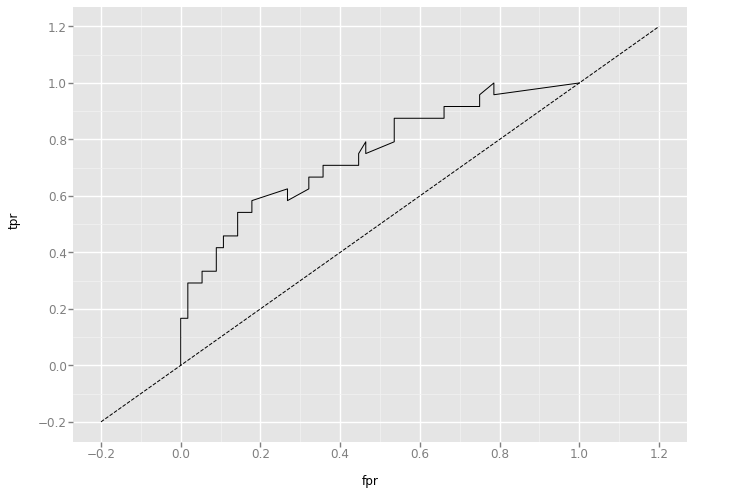

<ggplot: (140893308097)>

In [35]:
# roc curves and AUC
from ggplot import *
from sklearn.metrics import roc_curve, auc
%matplotlib inline

preds = log_mod.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

## Final Thoughts On Shifting to Machine Learning
Looking back at the models we fit using scikit-learn, you will notice that we did not get as much information back regarding coefficients in terms of the p-values. Even if you pull the coefficients, they do not match what was retrieved using the statsmodels.api library.

This represents the shift from statistics to machine learning:

- Statistics – Determine relationships and understand the driving mechanisms. Are relationships due to chance?
- Supervised Machine Learning – Work to predict as well as possible, often without regard to why it works well.